In [1]:
import numpy as np
import cv2 
import os
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
class HDRImaging():
    def __init__(self,path):
        filenames = ["img0.jpg", "img1.jpg", "img2.jpg", "img3.jpg"]
        self.images = [cv2.imread(''.join(path+fn)) for fn in filenames]
        self.times = np.array([1/30.0, 0.25, 2.5, 15.0], dtype=np.float32)
        self.N = len(self.images)
        self.width  = len(self.images[0])
        self.height = len(self.images[0][0])
        
        
    def showOriginalImages(self,figureSize):
        w_grid = self.width*(self.N+1)
        fig = plt.figure(constrained_layout=False,figsize=figureSize)   
        gs = gridspec.GridSpec(self.height,w_grid,figure=fig)
        s1=0

        ax = fig.add_subplot(gs[:,0:self.width],aspect='equal')
        ax.imshow(cv2.cvtColor(self.images[0],cv2.COLOR_BGR2RGB))            
 
        offset = 10
        for i in range(1,self.N):    
            ax = fig.add_subplot(gs[:,self.width*i+offset*i:self.width*(i+1)+offset*i],aspect='equal')
            ax.imshow(cv2.cvtColor(self.images[i],cv2.COLOR_BGR2RGB))            
            ax.set_xticks([])
            ax.set_yticks([])
        
            if i==self.N-3:
                ax.set_title('Original images',fontsize=20)


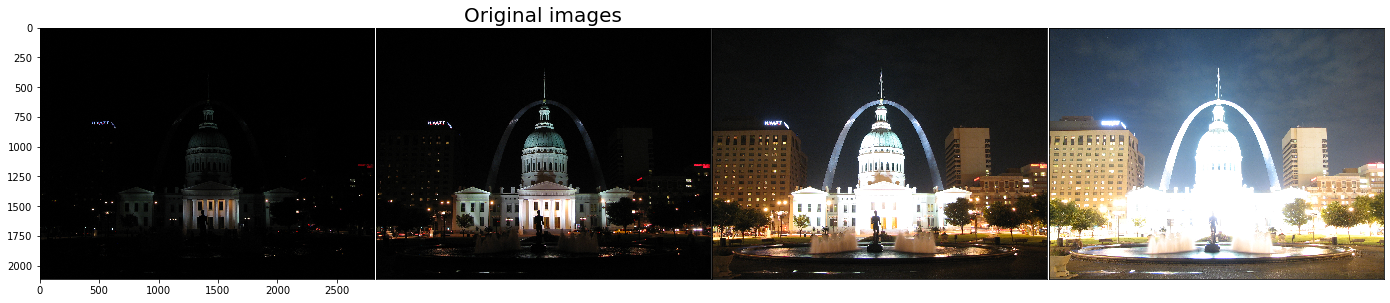

In [21]:
path = "/Users/gimoonnam/myGit/notRepos/ImageProcessing/images/SaintLouisTower/"
SL = HDRImaging(path)
#print(SL.images[3].shape)
# fig = plt.figure(constrained_layout=False,figsize=(7,7))
# plt.imshow(cv2.cvtColor(SL.images[3],cv2.COLOR_BGR2RGB))
SL.showOriginalImages(figureSize=(30,30))

In [4]:
# Align input images
alignMTB = cv2.createAlignMTB()
alignMTB.process(SL.images, SL.images)

In [7]:
# Obtain Camera Response Function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(SL.images, SL.times)

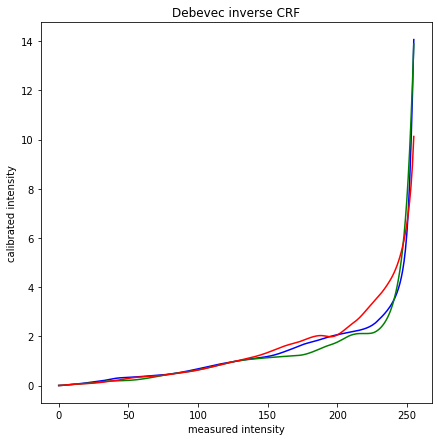

In [52]:
#print(responseDebevec.shape)
fig = plt.figure(constrained_layout=False,figsize=(7,7))   

plt.title('Debevec inverse CRF')
plt.xlabel('measured intensity')
plt.ylabel('calibrated intensity')

plt.plot(responseDebevec[:,:,0],'b')
plt.plot(responseDebevec[:,:,1],'g')
plt.plot(responseDebevec[:,:,2],'r')




In [11]:
# Merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(SL.images, SL.times, responseDebevec)

# Save HDR image.
pathToSave = os.getcwd()
cv2.imwrite(''.join(pathToSave+"/hdrDebevec.hdr"), hdrDebevec)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


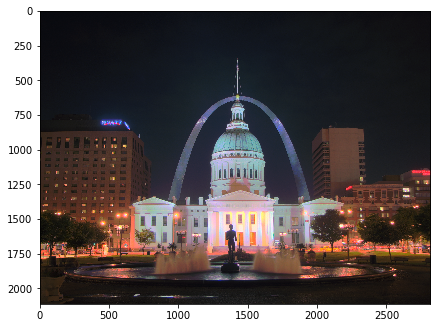

In [17]:
# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
cv2.imwrite("ldr-Drago.jpg", ldrDrago * 255)
fig = plt.figure(constrained_layout=False,figsize=(7,7))
plt.imshow(cv2.cvtColor(ldrDrago, cv2.COLOR_BGR2RGB))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


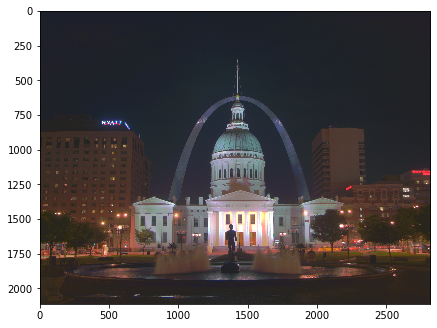

In [16]:
# Tonemap using Mantiuk's method to obtain 24-bit color image
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk
cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)
fig = plt.figure(constrained_layout=False,figsize=(7,7))
plt.imshow(cv2.cvtColor(ldrMantiuk, cv2.COLOR_BGR2RGB))